## Calculate Grit for bulk and single cell perturbseq data

Also calculate UMAP embeddings for each perturbation at the same time.

In [1]:
import pathlib
import numpy as np
import pandas as pd

from pycytominer import aggregate
from pycytominer.cyto_utils import infer_cp_features

from cytominer_eval import evaluate_metrics

import umap

import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA

# Step 1: Create a random matrix
np.random.seed(0)
matrix = np.random.rand(10, 5)  # 10 data points, 5 features each

# Step 2: Apply PCA (optional)
pca = PCA(n_components=3)  # Reducing to 3 dimensions
matrix_pca = pca.fit_transform(matrix)

# Step 3: Compute Cosine Distances
cosine_distances = squareform(pdist(matrix, 'cosine'))
cosine_distances_pca = squareform(pdist(matrix_pca, 'cosine'))

# Step 4: L2-Normalize the matrix
matrix_normed = matrix / np.linalg.norm(matrix, axis=1, keepdims=True)
matrix_pca_normed = pca.fit_transform(matrix_normed)
# matrix_pca_normed = matrix_pca / np.linalg.norm(matrix_pca, axis=1, keepdims=True)

# Step 5: Compute Euclidean Distances
euclidean_distances = squareform(pdist(matrix_normed, 'sqeuclidean')) / 2
euclidean_distances_pca = squareform(pdist(matrix_pca_normed, 'sqeuclidean')) / 2

np.allclose(cosine_distances, euclidean_distances)
np.allclose(cosine_distances_pca, euclidean_distances_pca)

False

True

True

In [4]:
np.random.seed(2021)

In [5]:
gse_id = "GSE132080"
perturbseq_data_dir = pathlib.Path("../../0.download-data/data/perturbseq/")
perturbseq_screen_phenotypes = "paper_supplement/Table_S16_perturb-seq_screen_phenotypes.txt"

In [6]:
# Load finalized single cell perturbseq data
gene_exp_file = pathlib.Path(f"{perturbseq_data_dir}/{gse_id}_final_analytical.tsv.gz")

sc_gene_exp_df = pd.read_csv(gene_exp_file, sep="\t")
gene_features = [x for x in sc_gene_exp_df if not x.startswith("Metadata_")]

print(sc_gene_exp_df.shape)
sc_gene_exp_df

/tmp/ipykernel_40914/545283870.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sc_gene_exp_df = pd.read_csv(gene_exp_file, sep="\t")


(23537, 1012)


,Metadata_cell_identity,Metadata_cell_barcode,Metadata_guide_identity,Metadata_read_count,Metadata_UMI_count,Metadata_coverage,Metadata_gemgroup,Metadata_good_coverage,Metadata_number_of_cells,Metadata_gene_identity,...,YPEL4,YPEL5,ZBTB38,ZFAS1,ZFP36L1,ZNF365,ZNF43,ZNF483,ZNF556,ZYX
0,sc_profile_0,AAACCTGAGAGTAATC-1,RAN_RAN_+_131356438.23-P1P2_12,544.0,34.0,16.000000,1.0,True,1.0,RAN,...,-0.09309,-0.632468,-0.539091,-1.633805,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
1,sc_profile_1,AAACCTGAGGGATCTG-1,neg_ctrl_non-targeting_00089,267.0,19.0,14.052632,1.0,True,1.0,neg,...,-0.09309,-0.632468,-0.539091,1.610220,1.322265,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
2,sc_profile_2,AAACCTGAGGTCATCT-1,POLR2H_POLR2H_+_184081251.23-P1P2_08,622.0,34.0,18.294118,1.0,True,1.0,POLR2H,...,-0.09309,-0.632468,-0.539091,-0.567252,0.057540,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
3,sc_profile_3,AAACCTGCAATGGAGC-1,TUBB_TUBB_+_30688126.23-P1_03,433.0,20.0,21.650000,1.0,True,1.0,TUBB,...,-0.09309,1.765279,-0.539091,-1.659420,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
4,sc_profile_4,AAACCTGCACCAGGCT-1,CDC23_CDC23_-_137548987.23-P1P2_04,136.0,8.0,17.000000,1.0,True,1.0,CDC23,...,-0.09309,0.686753,-0.539091,0.541260,0.934539,-0.012155,-0.017763,-0.026877,-0.0524,1.406718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23532,sc_profile_23532,TTTGTCAGTTTGACTG-3,CDC23_CDC23_-_137548987.23-P1P2_11,1509.0,106.0,14.235849,3.0,True,3.0,CDC23,...,-0.09309,0.207130,-0.539091,-0.772589,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
23533,sc_profile_23533,TTTGTCAGTTTGTTGG-3,ATP5E_ATP5E_-_57607036.23-P1P2_16,1207.0,73.0,16.534247,3.0,True,1.0,ATP5E,...,-0.09309,-0.632468,-0.539091,-0.539488,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
23534,sc_profile_23534,TTTGTCATCACAAACC-3,HSPE1_HSPE1_+_198365089.23-P1P2_01,378.0,25.0,15.120000,3.0,True,1.0,HSPE1,...,-0.09309,-0.632468,0.738755,-0.341440,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
23535,sc_profile_23535,TTTGTCATCAGCATGT-3,neg_ctrl_non-targeting_00028,856.0,53.0,16.150943,3.0,True,1.0,neg,...,-0.09309,0.379025,0.571873,0.294543,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229


In [7]:
sc_gene_exp_df.filter(regex="Metadata").columns


Index(['Metadata_cell_identity', 'Metadata_cell_barcode',
       'Metadata_guide_identity', 'Metadata_read_count', 'Metadata_UMI_count',
       'Metadata_coverage', 'Metadata_gemgroup', 'Metadata_good_coverage',
       'Metadata_number_of_cells', 'Metadata_gene_identity',
       'Metadata_barcode', 'Metadata_sequence'],
      dtype='object')

In [8]:
sc_gene_exp_df.Metadata_guide_identity

0              RAN_RAN_+_131356438.23-P1P2_12
1                neg_ctrl_non-targeting_00089
2        POLR2H_POLR2H_+_184081251.23-P1P2_08
3               TUBB_TUBB_+_30688126.23-P1_03
4          CDC23_CDC23_-_137548987.23-P1P2_04
                         ...                 
23532      CDC23_CDC23_-_137548987.23-P1P2_11
23533       ATP5E_ATP5E_-_57607036.23-P1P2_16
23534      HSPE1_HSPE1_+_198365089.23-P1P2_01
23535            neg_ctrl_non-targeting_00028
23536           CAD_CAD_+_27440280.23-P1P2_07
Name: Metadata_guide_identity, Length: 23537, dtype: object

In [9]:
sc_gene_exp_df.filter(regex="Metadata").describe(include="all")

,Metadata_cell_identity,Metadata_cell_barcode,Metadata_guide_identity,Metadata_read_count,Metadata_UMI_count,Metadata_coverage,Metadata_gemgroup,Metadata_good_coverage,Metadata_number_of_cells,Metadata_gene_identity,Metadata_barcode,Metadata_sequence
count,23537,23513,23513,23513.000000,23513.000000,23513.000000,23513.000000,23513,23513.000000,23513,23537,23537
unique,23537,23513,139,NaN,NaN,NaN,NaN,2,NaN,27,23537,23253
top,sc_profile_0,AAACCTGAGAGTAATC-1,GNB2L1_GNB2L1_+_180670873.23-P1P2_08,NaN,NaN,NaN,NaN,True,NaN,neg,AAACCTGAGAGTAATC-1,TAAGTGCCAACGATCT
freq,1,1,584,NaN,NaN,NaN,NaN,22268,NaN,2436,1,3
mean,NaN,NaN,NaN,679.586739,32.831625,20.660006,1.957428,NaN,1.076511,NaN,NaN,NaN
std,NaN,NaN,NaN,449.452077,20.562185,6.874787,0.819193,NaN,0.456669,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,353.000000,18.000000,16.400000,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,619.000000,31.000000,19.181818,2.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,924.000000,44.000000,25.153846,3.000000,NaN,1.000000,NaN,NaN,NaN


In [10]:
sc_gene_exp_df.groupby(["Metadata_gene_identity", "Metadata_guide_identity"]).count()

Metadata_cell_identity  \
Metadata_gene_identity Metadata_guide_identity                                     
*                      *                                                     308   
ALDOA                  ALDOA_ALDOA_+_30077139.23-P1P2_00                     115   
                       ALDOA_ALDOA_+_30077139.23-P1P2_06                     156   
                       ALDOA_ALDOA_+_30077139.23-P1P2_07                     103   
                       ALDOA_ALDOA_+_30077139.23-P1P2_13                     170   
...                                                                          ...   
neg                    neg_ctrl_non-targeting_00283                          212   
                       neg_ctrl_non-targeting_00406                          260   
                       neg_ctrl_non-targeting_00527                          177   
                       neg_ctrl_non-targeting_00802                          185   
                       neg_ctrl_non-targeting_01040                          280   

                                                          Metadata_cell_barcode  \
Metadata_gene_identity Metadata_guide_identity                                    
*                      *                                                    308   
ALDOA                  ALDOA_ALDOA_+_30077139.23-P1P2_00                    115   
                       ALDOA_ALDOA_+_30077139.23-P1P2_06                    156   
                       ALDOA_ALDOA_+_30077139.23-P1P2_07                    103   
                       ALDOA_ALDOA_+_30077139.23-P1P2_13                    170   
...                                                                         ...   
neg                    neg_ctrl_non-targeting_00283                         212   
                       neg_ctrl_non-targeting_00406                         260   
                       neg_ctrl_non-targeting_00527                         177   
                       neg_ctrl_non-targeting_00802                         185   
                       neg_ctrl_non-targeting_01040                         280   

                                                          Metadata_read_count  \
Metadata_gene_identity Metadata_guide_identity                                  
*                      *                                                  308   
ALDOA                  ALDOA_ALDOA_+_30077139.23-P1P2_00                  115   
                       ALDOA_ALDOA_+_30077139.23-P1P2_06                  156   
                       ALDOA_ALDOA_+_30077139.23-P1P2_07                  103   
                       ALDOA_ALDOA_+_30077139.23-P1P2_13                  170   
...                                                                       ...   
neg                    neg_ctrl_non-targeting_00283                       212   
                       neg_ctrl_non-targeting_00406                       260   
                       neg_ctrl_non-targeting_00527                       177   
                       neg_ctrl_non-targeting_00802                       185   
                       neg_ctrl_non-targeting_01040                       280   

                                                          Metadata_UMI_count  \
Metadata_gene_identity Metadata_guide_identity                                 
*                      *                                                 308   
ALDOA                  ALDOA_ALDOA_+_30077139.23-P1P2_00                 115   
                       ALDOA_ALDOA_+_30077139.23-P1P2_06                 156   
                       ALDOA_ALDOA_+_30077139.23-P1P2_07                 103   
                       ALDOA_ALDOA_+_30077139.23-P1P2_13                 170   
...                                                                      ...   
neg                    neg_ctrl_non-targeting_00283                      212   
                       neg_ctrl_non-targeting_00406                      260   
                       neg_ctrl

In [11]:
sc_gene_exp_df[sc_gene_exp_df.Metadata_gene_identity == "ALDOA"]["Metadata_guide_identity"].value_counts()

Metadata_guide_identity
ALDOA_ALDOA_+_30077139.23-P1P2_13    170
ALDOA_ALDOA_+_30077139.23-P1P2_06    156
ALDOA_ALDOA_+_30077139.23-P1P2_00    115
ALDOA_ALDOA_+_30077139.23-P1P2_07    103
ALDOA_ALDOA_+_30077139.23-P1P2_14     81
Name: count, dtype: int64

In [12]:
sc_gene_exp_df.query("Metadata_gene_identity == 'neg'").Metadata_guide_identity.str.contains("neg_ctrl").sum()

2436

In [13]:
sc_gene_exp_df.Metadata_good_coverage.value_counts()

Metadata_good_coverage
True     22268
False     1245
Name: count, dtype: int64

In [14]:
sc_gene_exp_df.query("Metadata_good_coverage == False").Metadata_gene_identity.value_counts()

Metadata_gene_identity
*          301
GATA1       98
neg         76
POLR1D      55
DBR1        50
BCR         44
GNB2L1      40
RPS14       37
COX11       36
POLR2H      36
ATP5E       36
SEC61A1     35
RAN         35
DUT         35
GINS1       35
CDC23       33
CAD         31
RPS15       30
TUBB        29
HSPA5       28
MTOR        28
RPS18       26
HSPE1       24
HSPA9       19
ALDOA       18
RPL9        17
EIF2S1      13
Name: count, dtype: int64

In [15]:
sc_gene_exp_df.query("Metadata_gene_identity == 'GATA1'").groupby(["Metadata_guide_identity", "Metadata_good_coverage"]).count()


Metadata_cell_identity  \
Metadata_guide_identity           Metadata_good_coverage                           
GATA1_GATA1_-_48645022.23-P1P2_00 False                                       15   
                                  True                                        41   
GATA1_GATA1_-_48645022.23-P1P2_03 False                                       31   
                                  True                                       112   
GATA1_GATA1_-_48645022.23-P1P2_04 False                                       10   
                                  True                                        42   
GATA1_GATA1_-_48645022.23-P1P2_06 False                                       19   
                                  True                                       121   
GATA1_GATA1_-_48645022.23-P1P2_08 False                                       19   
                                  True                                        60   
GATA1_GATA1_-_48645022.23-P1P2_12 False                                        4   
                                  True                                       103   

                                                          Metadata_cell_barcode  \
Metadata_guide_identity           Metadata_good_coverage                          
GATA1_GATA1_-_48645022.23-P1P2_00 False                                      15   
                                  True                                       41   
GATA1_GATA1_-_48645022.23-P1P2_03 False                                      31   
                                  True                                      112   
GATA1_GATA1_-_48645022.23-P1P2_04 False                                      10   
                                  True                                       42   
GATA1_GATA1_-_48645022.23-P1P2_06 False                                      19   
                                  True                                      121   
GATA1_GATA1_-_48645022.23-P1P2_08 False                                      19   
                                  True                                       60   
GATA1_GATA1_-_48645022.23-P1P2_12 False                                       4   
                                  True                                      103   

                                                          Metadata_read_count  \
Metadata_guide_identity           Metadata_good_coverage                        
GATA1_GATA1_-_48645022.23-P1P2_00 False                                    15   
                                  True                                     41   
GATA1_GATA1_-_48645022.23-P1P2_03 False                                    31   
                                  True                                    112   
GATA1_GATA1_-_48645022.23-P1P2_04 False                                    10   
                                  True                                     42   
GATA1_GATA1_-_48645022.23-P1P2_06 False                                    19   
                                  True                                    121   
GATA1_GATA1_-_48645022.23-P1P2_08 False                                    19   
                                  True                                     60   
GATA1_GATA1_-_48645022.23-P1P2_12 False                                     4   
                                  True                                    103   

                                                          Metadata_UMI_count  \
Metadata_guide_identity           Metadata_good_coverage                       
GATA1_GATA1_-_48645022.23-P1P2_00 False                                   15   
                                  True                                    41   
GATA1_GATA1_-_48645022.23-P1P2_03 False                                   31   
                                  True                                   112   
GATA1_GATA1_-_48645022.23-P1P2_04 False                                   10   
                       

In [16]:
sc_gene_exp_df = sc_gene_exp_df.query("Metadata_gene_identity != '*'").reset_index(drop=True)

In [17]:
sc_gene_exp_df[sc_gene_exp_df["Metadata_gene_identity"] == 'neg']["Metadata_guide_identity"].value_counts()

Metadata_guide_identity
neg_ctrl_non-targeting_00054    317
neg_ctrl_non-targeting_00089    293
neg_ctrl_non-targeting_00217    289
neg_ctrl_non-targeting_01040    280
neg_ctrl_non-targeting_00406    260
neg_ctrl_non-targeting_00028    232
neg_ctrl_non-targeting_00283    212
neg_ctrl_non-targeting_00001    191
neg_ctrl_non-targeting_00802    185
neg_ctrl_non-targeting_00527    177
Name: count, dtype: int64

In [18]:
sc_gene_exp_df[sc_gene_exp_df["Metadata_gene_identity"] == 'neg'].sample(frac=0.2)["Metadata_guide_identity"].value_counts()

Metadata_guide_identity
neg_ctrl_non-targeting_00089    67
neg_ctrl_non-targeting_00054    67
neg_ctrl_non-targeting_00217    59
neg_ctrl_non-targeting_00406    48
neg_ctrl_non-targeting_01040    47
neg_ctrl_non-targeting_00028    46
neg_ctrl_non-targeting_00001    42
neg_ctrl_non-targeting_00283    42
neg_ctrl_non-targeting_00527    35
neg_ctrl_non-targeting_00802    34
Name: count, dtype: int64

In [19]:
print(sc_gene_exp_df.shape)
sc_gene_exp_df = sc_gene_exp_df.query("Metadata_good_coverage == True").reset_index(drop=True)
sc_gene_exp_df

(23229, 1012)


,Metadata_cell_identity,Metadata_cell_barcode,Metadata_guide_identity,Metadata_read_count,Metadata_UMI_count,Metadata_coverage,Metadata_gemgroup,Metadata_good_coverage,Metadata_number_of_cells,Metadata_gene_identity,...,YPEL4,YPEL5,ZBTB38,ZFAS1,ZFP36L1,ZNF365,ZNF43,ZNF483,ZNF556,ZYX
0,sc_profile_0,AAACCTGAGAGTAATC-1,RAN_RAN_+_131356438.23-P1P2_12,544.0,34.0,16.000000,1.0,True,1.0,RAN,...,-0.09309,-0.632468,-0.539091,-1.633805,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
1,sc_profile_1,AAACCTGAGGGATCTG-1,neg_ctrl_non-targeting_00089,267.0,19.0,14.052632,1.0,True,1.0,neg,...,-0.09309,-0.632468,-0.539091,1.610220,1.322265,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
2,sc_profile_2,AAACCTGAGGTCATCT-1,POLR2H_POLR2H_+_184081251.23-P1P2_08,622.0,34.0,18.294118,1.0,True,1.0,POLR2H,...,-0.09309,-0.632468,-0.539091,-0.567252,0.057540,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
3,sc_profile_3,AAACCTGCAATGGAGC-1,TUBB_TUBB_+_30688126.23-P1_03,433.0,20.0,21.650000,1.0,True,1.0,TUBB,...,-0.09309,1.765279,-0.539091,-1.659420,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
4,sc_profile_4,AAACCTGCACCAGGCT-1,CDC23_CDC23_-_137548987.23-P1P2_04,136.0,8.0,17.000000,1.0,True,1.0,CDC23,...,-0.09309,0.686753,-0.539091,0.541260,0.934539,-0.012155,-0.017763,-0.026877,-0.0524,1.406718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22256,sc_profile_23532,TTTGTCAGTTTGACTG-3,CDC23_CDC23_-_137548987.23-P1P2_11,1509.0,106.0,14.235849,3.0,True,3.0,CDC23,...,-0.09309,0.207130,-0.539091,-0.772589,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
22257,sc_profile_23533,TTTGTCAGTTTGTTGG-3,ATP5E_ATP5E_-_57607036.23-P1P2_16,1207.0,73.0,16.534247,3.0,True,1.0,ATP5E,...,-0.09309,-0.632468,-0.539091,-0.539488,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
22258,sc_profile_23534,TTTGTCATCACAAACC-3,HSPE1_HSPE1_+_198365089.23-P1P2_01,378.0,25.0,15.120000,3.0,True,1.0,HSPE1,...,-0.09309,-0.632468,0.738755,-0.341440,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
22259,sc_profile_23535,TTTGTCATCAGCATGT-3,neg_ctrl_non-targeting_00028,856.0,53.0,16.150943,3.0,True,1.0,neg,...,-0.09309,0.379025,0.571873,0.294543,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229


In [20]:
sc_gene_exp_df["Metadata_is_control"] = (sc_gene_exp_df["Metadata_gene_identity"] == 'neg').astype(int)
sc_gene_exp_df

,Metadata_cell_identity,Metadata_cell_barcode,Metadata_guide_identity,Metadata_read_count,Metadata_UMI_count,Metadata_coverage,Metadata_gemgroup,Metadata_good_coverage,Metadata_number_of_cells,Metadata_gene_identity,...,YPEL5,ZBTB38,ZFAS1,ZFP36L1,ZNF365,ZNF43,ZNF483,ZNF556,ZYX,Metadata_is_control
0,sc_profile_0,AAACCTGAGAGTAATC-1,RAN_RAN_+_131356438.23-P1P2_12,544.0,34.0,16.000000,1.0,True,1.0,RAN,...,-0.632468,-0.539091,-1.633805,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,0
1,sc_profile_1,AAACCTGAGGGATCTG-1,neg_ctrl_non-targeting_00089,267.0,19.0,14.052632,1.0,True,1.0,neg,...,-0.632468,-0.539091,1.610220,1.322265,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,1
2,sc_profile_2,AAACCTGAGGTCATCT-1,POLR2H_POLR2H_+_184081251.23-P1P2_08,622.0,34.0,18.294118,1.0,True,1.0,POLR2H,...,-0.632468,-0.539091,-0.567252,0.057540,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,0
3,sc_profile_3,AAACCTGCAATGGAGC-1,TUBB_TUBB_+_30688126.23-P1_03,433.0,20.0,21.650000,1.0,True,1.0,TUBB,...,1.765279,-0.539091,-1.659420,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,0
4,sc_profile_4,AAACCTGCACCAGGCT-1,CDC23_CDC23_-_137548987.23-P1P2_04,136.0,8.0,17.000000,1.0,True,1.0,CDC23,...,0.686753,-0.539091,0.541260,0.934539,-0.012155,-0.017763,-0.026877,-0.0524,1.406718,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22256,sc_profile_23532,TTTGTCAGTTTGACTG-3,CDC23_CDC23_-_137548987.23-P1P2_11,1509.0,106.0,14.235849,3.0,True,3.0,CDC23,...,0.207130,-0.539091,-0.772589,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,0
22257,sc_profile_23533,TTTGTCAGTTTGTTGG-3,ATP5E_ATP5E_-_57607036.23-P1P2_16,1207.0,73.0,16.534247,3.0,True,1.0,ATP5E,...,-0.632468,-0.539091,-0.539488,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,0
22258,sc_profile_23534,TTTGTCATCACAAACC-3,HSPE1_HSPE1_+_198365089.23-P1P2_01,378.0,25.0,15.120000,3.0,True,1.0,HSPE1,...,-0.632468,0.738755,-0.341440,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,0
22259,sc_profile_23535,TTTGTCATCAGCATGT-3,neg_ctrl_non-targeting_00028,856.0,53.0,16.150943,3.0,True,1.0,neg,...,0.379025,0.571873,0.294543,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,1


In [21]:
pair_config = {
    "pos_sameby": {"all": ["Metadata_guide_identity", "Metadata_is_control == 0"], "any": []},
    "pos_diffby": {"all": [], "any": []},
    "neg_sameby": {"all": [], "any": []},
    "neg_diffby": {"all": ["Metadata_is_control"], "any": []},
}

map_config = {
    "mean_ap": {
        "null_size": 10000,
        "groupby_columns": ["Metadata_guide_identity"],
    },
}

In [44]:
map_results = evaluate_metrics(
    profiles=sc_gene_exp_df.reset_index(drop=True),
    features=gene_features,
    meta_features=sc_gene_exp_df.filter(regex="Metadata_").columns,
    replicate_groups=pair_config,
    metrics_config=map_config,
    use_copairs=True,
)


Calculating distances.
Pos pairs size: 1965374, Neg pairs size: 46966360


  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/2349 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/97 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


In [46]:
map_results["mean_ap"].to_csv("sc_map_results_goodcov.csv", index=False)

In [47]:
sc_map_results = pd.read_csv("sc_map_results_goodcov.csv")
sc_map_results

,Metadata_guide_identity,mean_ap,p_value,n_pos_pairs,n_total_pairs
0,ALDOA_ALDOA_+_30077139.23-P1P2_00,0.055945,0.280686,107.0,2467.0
1,ALDOA_ALDOA_+_30077139.23-P1P2_06,0.074734,0.253652,150.0,2510.0
2,ALDOA_ALDOA_+_30077139.23-P1P2_07,0.050627,0.369978,101.0,2461.0
3,ALDOA_ALDOA_+_30077139.23-P1P2_13,0.068752,0.468390,164.0,2524.0
4,ALDOA_ALDOA_+_30077139.23-P1P2_14,0.036680,0.432896,80.0,2440.0
...,...,...,...,...,...
123,TUBB_TUBB_+_30688126.23-P1_00,0.116624,0.081054,195.0,2555.0
124,TUBB_TUBB_+_30688126.23-P1_01,0.071398,0.197025,107.0,2467.0
125,TUBB_TUBB_+_30688126.23-P1_03,0.049796,0.221968,84.0,2444.0
126,TUBB_TUBB_+_30688126.23-P1_06,0.062491,0.160008,94.0,2454.0


In [48]:
sc_map_results["-log10(p-value)"] = -np.log10(sc_map_results["p_value"])
sc_map_results["p < 0.05"] = sc_map_results["p_value"] < 0.05

sc_map_results.rename({
    "mean_ap": "mAP",
    "nlog10pvalue": "-log10(p-value)",
    "above_p_threshold": "p < 0.05",
    }, axis=1, inplace=True)

/tmp/ipykernel_78919/659986140.py:41: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(


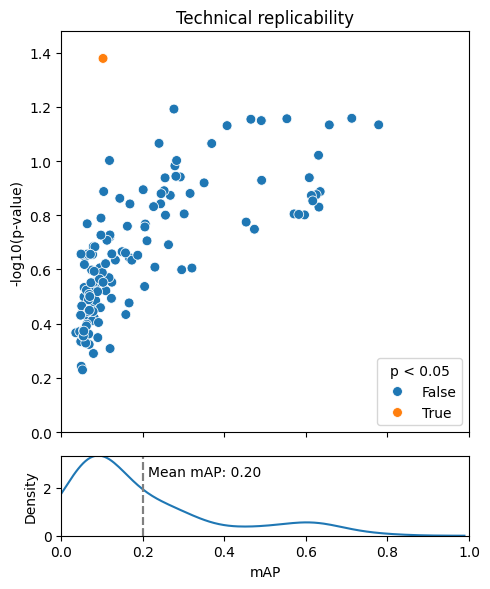

In [26]:
df = sc_map_results

def remove_inner_ticklabels(fig: plt.Figure):
    """
    Remove inner ticklabels from a figure.

    Parameters
    ----------
    fig : matplotlib.figure.Figure
        Figure to remove inner ticklabels from.
    """
    for ax in fig.axes:
        try:
            ax.label_outer()
        except AttributeError:
            pass


fig, axes = plt.subplots(2, 1, figsize=(5, 6), gridspec_kw={'height_ratios': [5, 1]})

mean_map = df['mAP'].mean()
sns.scatterplot(
    ax=axes[0], 
    data=df, 
    x='mAP', 
    y='-log10(p-value)', 
    hue='p < 0.05',
    s=50
)
axes[0].set_title("Technical replicability")


axes[0].set_xlabel("")
axes[0].set_ylim(0, max(df['-log10(p-value)'])+0.1)
sns.move_legend(axes[0], "lower right")

# Second Row: KDE plots
max_kde_y = 0
mean_map = df['mAP'].mean()
for p_value in df['p < 0.05'].unique():
    ax = sns.kdeplot(
        ax=axes[1],
        data=df[df['p < 0.05'] == p_value],
        x='mAP', 
        label=str(p_value)
    )
    max_kde_y = max(max_kde_y, max(ax.lines[-1].get_ydata()))
    axes[1].axvline(mean_map, color='grey', linestyle='--')
# axes[1].set_ylabel("")
axes[1].set_ylim(0, max_kde_y)
axes[1].text(mean_map+0.01, 0.75, f"Mean mAP: {mean_map:.2f}", transform=axes[1].transAxes)

for ax in axes.flat:
    ax.set_xlim(0, 1)  # Set x-axis limit to 0-1 for all subplots

remove_inner_ticklabels(fig)
plt.tight_layout()
plt.show()


/tmp/ipykernel_78919/659986140.py:41: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(


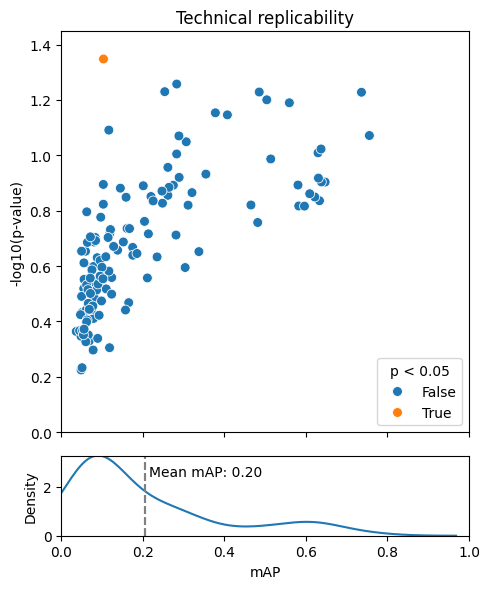

In [49]:
df = sc_map_results

def remove_inner_ticklabels(fig: plt.Figure):
    """
    Remove inner ticklabels from a figure.

    Parameters
    ----------
    fig : matplotlib.figure.Figure
        Figure to remove inner ticklabels from.
    """
    for ax in fig.axes:
        try:
            ax.label_outer()
        except AttributeError:
            pass


fig, axes = plt.subplots(2, 1, figsize=(5, 6), gridspec_kw={'height_ratios': [5, 1]})

mean_map = df['mAP'].mean()
sns.scatterplot(
    ax=axes[0], 
    data=df, 
    x='mAP', 
    y='-log10(p-value)', 
    hue='p < 0.05',
    s=50
)
axes[0].set_title("Technical replicability")


axes[0].set_xlabel("")
axes[0].set_ylim(0, max(df['-log10(p-value)'])+0.1)
sns.move_legend(axes[0], "lower right")

# Second Row: KDE plots
max_kde_y = 0
mean_map = df['mAP'].mean()
for p_value in df['p < 0.05'].unique():
    ax = sns.kdeplot(
        ax=axes[1],
        data=df[df['p < 0.05'] == p_value],
        x='mAP', 
        label=str(p_value)
    )
    max_kde_y = max(max_kde_y, max(ax.lines[-1].get_ydata()))
    axes[1].axvline(mean_map, color='grey', linestyle='--')
# axes[1].set_ylabel("")
axes[1].set_ylim(0, max_kde_y)
axes[1].text(mean_map+0.01, 0.75, f"Mean mAP: {mean_map:.2f}", transform=axes[1].transAxes)

for ax in axes.flat:
    ax.set_xlim(0, 1)  # Set x-axis limit to 0-1 for all subplots

remove_inner_ticklabels(fig)
plt.tight_layout()
plt.show()


In [5]:
print(len(gene_features))

1000


In [22]:
# Load activities results (bulk)
file = perturbseq_data_dir / perturbseq_screen_phenotypes
activity_df = pd.read_csv(file, sep="\t").rename({"Unnamed: 0": "id"}, axis="columns")

# Create a perturbation column to match with other IDs
activity_df = activity_df.assign(perturbation=activity_df.gene + "_" + activity_df.id)

print(activity_df.shape)
activity_df.head()

(128, 8)


,id,sequence,gene,gamma_day5,gamma_day10,relative_activity_day5,relative_activity_day10,perturbation
0,ALDOA_+_30077139.23-P1P2_00,GGTCACCAGGACCCCTTCTG,ALDOA,-0.412746,-0.366469,1.000000,1.000000,ALDOA_ALDOA_+_30077139.23-P1P2_00
1,ALDOA_+_30077139.23-P1P2_06,GGTCACCAGGATCCCTTCTG,ALDOA,-0.396687,-0.348503,0.961091,0.950977,ALDOA_ALDOA_+_30077139.23-P1P2_06
2,ALDOA_+_30077139.23-P1P2_07,GGTCACCAGGCCCCCTTCTG,ALDOA,-0.360892,-0.335059,0.874369,0.914291,ALDOA_ALDOA_+_30077139.23-P1P2_07
3,ALDOA_+_30077139.23-P1P2_13,GGTCACCAGGACCCCTTTTG,ALDOA,0.017063,-0.000220,-0.041340,0.000601,ALDOA_ALDOA_+_30077139.23-P1P2_13
4,ALDOA_+_30077139.23-P1P2_14,GGTCACCAGGACCGCTTCTG,ALDOA,-0.175243,-0.156611,0.424579,0.427353,ALDOA_ALDOA_+_30077139.23-P1P2_14


### Bulk data

In [24]:
# Load bulk perturbseq data
bulk_file = pathlib.Path(f"{perturbseq_data_dir}/{gse_id}_bulk_final_analytical.tsv.gz")
bulk_df = pd.read_csv(bulk_file, sep="\t")
bulk_df

,Metadata_guide_identity,Metadata_gene_identity,ABCA1,ABCC3,ABI3BP,AC002331.1,AC002480.3,AC003092.1,AC005616.2,AC006262.5,...,YPEL4,YPEL5,ZBTB38,ZFAS1,ZFP36L1,ZNF365,ZNF43,ZNF483,ZNF556,ZYX
0,ALDOA_ALDOA_+_30077139.23-P1P2_00,ALDOA,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.09309,-0.632468,-0.539091,-0.170790,0.014776,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
1,ALDOA_ALDOA_+_30077139.23-P1P2_06,ALDOA,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.09309,-0.632468,-0.539091,-0.045114,0.042050,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
2,ALDOA_ALDOA_+_30077139.23-P1P2_07,ALDOA,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.09309,-0.632468,-0.539091,-0.101183,0.027887,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
3,ALDOA_ALDOA_+_30077139.23-P1P2_13,ALDOA,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.09309,-0.632468,-0.539091,-0.050848,-0.107389,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
4,ALDOA_ALDOA_+_30077139.23-P1P2_14,ALDOA,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.09309,-0.632468,-0.539091,0.150701,0.051095,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,neg_ctrl_non-targeting_00283,neg,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.09309,-0.632468,-0.539091,-0.115780,-0.179220,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
134,neg_ctrl_non-targeting_00406,neg,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.09309,-0.632468,-0.539091,-0.090275,-0.027992,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
135,neg_ctrl_non-targeting_00527,neg,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.09309,-0.632468,-0.539091,-0.084769,-0.130657,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
136,neg_ctrl_non-targeting_00802,neg,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.09309,-0.632468,-0.539091,-0.007599,-0.058443,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229


In [25]:
bulk_df = bulk_df.query("Metadata_gene_identity != '*'").reset_index(drop=True)
bulk_df["Metadata_is_control"] = (bulk_df["Metadata_gene_identity"] == 'neg').astype(int)
bulk_df

,Metadata_guide_identity,Metadata_gene_identity,ABCA1,ABCC3,ABI3BP,AC002331.1,AC002480.3,AC003092.1,AC005616.2,AC006262.5,...,YPEL5,ZBTB38,ZFAS1,ZFP36L1,ZNF365,ZNF43,ZNF483,ZNF556,ZYX,Metadata_is_control
0,ALDOA_ALDOA_+_30077139.23-P1P2_00,ALDOA,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.632468,-0.539091,-0.170790,0.014776,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,0
1,ALDOA_ALDOA_+_30077139.23-P1P2_06,ALDOA,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.632468,-0.539091,-0.045114,0.042050,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,0
2,ALDOA_ALDOA_+_30077139.23-P1P2_07,ALDOA,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.632468,-0.539091,-0.101183,0.027887,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,0
3,ALDOA_ALDOA_+_30077139.23-P1P2_13,ALDOA,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.632468,-0.539091,-0.050848,-0.107389,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,0
4,ALDOA_ALDOA_+_30077139.23-P1P2_14,ALDOA,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.632468,-0.539091,0.150701,0.051095,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,neg_ctrl_non-targeting_00283,neg,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.632468,-0.539091,-0.115780,-0.179220,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,1
134,neg_ctrl_non-targeting_00406,neg,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.632468,-0.539091,-0.090275,-0.027992,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,1
135,neg_ctrl_non-targeting_00527,neg,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.632468,-0.539091,-0.084769,-0.130657,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,1
136,neg_ctrl_non-targeting_00802,neg,-0.078689,-0.093494,-0.01406,-0.013653,-0.018973,-0.026806,-0.034066,-0.485621,...,-0.632468,-0.539091,-0.007599,-0.058443,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229,1


In [26]:
pair_config = {
    "pos_sameby": {"all": ["Metadata_gene_identity", "Metadata_is_control == 0"], "any": []},
    "pos_diffby": {"all": [], "any": []},
    "neg_sameby": {"all": [], "any": []},
    "neg_diffby": {"all": ["Metadata_is_control"], "any": []},
}

map_config = {
    "mean_ap": {
        "null_size": 10000,
        "groupby_columns": ["Metadata_gene_identity"],
    },
}

In [27]:
map_results = evaluate_metrics(
    profiles=bulk_df.reset_index(drop=True),
    features=gene_features,
    meta_features=bulk_df.filter(regex="Metadata_").columns,
    replicate_groups=pair_config,
    metrics_config=map_config,
    use_copairs=True,
)


Calculating distances.
Pos pairs size: 265, Neg pairs size: 1280


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/3 [00:00<?, ?it/s]

In [28]:
bulk_map_results = map_results["mean_ap"]

bulk_map_results["-log10(p-value)"] = -np.log10(bulk_map_results["p_value"])
bulk_map_results["p < 0.05"] = bulk_map_results["p_value"] < 0.05

bulk_map_results.rename({
    "mean_ap": "mAP",
    "nlog10pvalue": "-log10(p-value)",
    "above_p_threshold": "p < 0.05",
    }, axis=1, inplace=True)
bulk_map_results

,Metadata_gene_identity,mAP,p_value,n_pos_pairs,n_total_pairs,-log10(p-value),p < 0.05
0,ALDOA,0.494726,0.425897,4.0,14.0,0.370695,False
1,ATP5E,0.632972,0.331287,4.0,14.0,0.479796,False
2,BCR,0.768315,0.125237,5.0,15.0,0.902266,False
3,CAD,0.842491,0.197500,4.0,14.0,0.704432,False
4,CDC23,0.794915,0.201040,4.0,14.0,0.696718,False
5,COX11,0.442733,0.425577,4.0,14.0,0.371021,False
6,DBR1,0.728418,0.127367,4.0,14.0,0.894942,False
7,DUT,0.919286,0.024858,4.0,14.0,1.604542,True
8,EIF2S1,0.807274,0.201160,4.0,14.0,0.696459,False
9,GATA1,0.842469,0.166833,5.0,15.0,0.777717,False


/tmp/ipykernel_40914/3172002166.py:41: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(


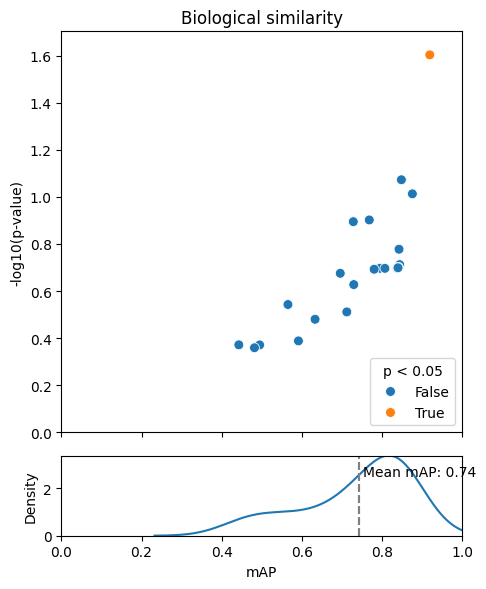

In [29]:
df = bulk_map_results

def remove_inner_ticklabels(fig: plt.Figure):
    """
    Remove inner ticklabels from a figure.

    Parameters
    ----------
    fig : matplotlib.figure.Figure
        Figure to remove inner ticklabels from.
    """
    for ax in fig.axes:
        try:
            ax.label_outer()
        except AttributeError:
            pass


fig, axes = plt.subplots(2, 1, figsize=(5, 6), gridspec_kw={'height_ratios': [5, 1]})

mean_map = df['mAP'].mean()
sns.scatterplot(
    ax=axes[0], 
    data=df, 
    x='mAP', 
    y='-log10(p-value)', 
    hue='p < 0.05',
    s=50
)
axes[0].set_title("Biological similarity")


axes[0].set_xlabel("")
axes[0].set_ylim(0, max(df['-log10(p-value)'])+0.1)
sns.move_legend(axes[0], "lower right")

# Second Row: KDE plots
max_kde_y = 0
mean_map = df['mAP'].mean()
for p_value in df['p < 0.05'].unique():
    ax = sns.kdeplot(
        ax=axes[1],
        data=df[df['p < 0.05'] == p_value],
        x='mAP', 
        label=str(p_value)
    )
    max_kde_y = max(max_kde_y, max(ax.lines[-1].get_ydata()))
    axes[1].axvline(mean_map, color='grey', linestyle='--')
# axes[1].set_ylabel("")
axes[1].set_ylim(0, max_kde_y)
axes[1].text(mean_map+0.01, 0.75, f"Mean mAP: {mean_map:.2f}", transform=axes[1].transAxes)

for ax in axes.flat:
    ax.set_xlim(0, 1)  # Set x-axis limit to 0-1 for all subplots

remove_inner_ticklabels(fig)
plt.tight_layout()
plt.show()


In [35]:
bulk_map_results.Metadata_gene_identity.values 

array(['ALDOA', 'ATP5E', 'BCR', 'CAD', 'CDC23', 'COX11', 'DBR1', 'DUT',
       'EIF2S1', 'GATA1', 'GINS1', 'GNB2L1', 'HSPA5', 'HSPA9', 'HSPE1',
       'MTOR', 'POLR1D', 'POLR2H', 'RAN', 'RPL9', 'RPS14', 'RPS15',
       'RPS18', 'SEC61A1', 'TUBB'], dtype=object)

In [38]:
activity_df.gene.unique()

array(['ALDOA', 'ATP5E', 'BCR', 'CAD', 'CDC23', 'COX11', 'DBR1', 'DUT',
       'EIF2S1', 'GATA1', 'GINS1', 'GNB2L1', 'HSPA5', 'HSPA9', 'HSPE1',
       'MTOR', 'POLR1D', 'POLR2H', 'RAN', 'RPL9', 'RPS14', 'RPS15',
       'RPS18', 'SEC61A1', 'TUBB'], dtype=object)

In [39]:
# result.merge(activity_df, left_on="perturbation", right_on="perturbation")

bulk_map_results = bulk_map_results.merge(activity_df.groupby("gene")["relative_activity_day5"].mean(), left_on="Metadata_gene_identity", right_on="gene")
bulk_map_results

,Metadata_gene_identity,mAP,p_value,n_pos_pairs,n_total_pairs,-log10(p-value),p < 0.05,relative_activity_day5
0,ALDOA,0.494726,0.425897,4.0,14.0,0.370695,False,0.643740
1,ATP5E,0.632972,0.331287,4.0,14.0,0.479796,False,0.744412
2,BCR,0.768315,0.125237,5.0,15.0,0.902266,False,0.644184
3,CAD,0.842491,0.197500,4.0,14.0,0.704432,False,0.706873
4,CDC23,0.794915,0.201040,4.0,14.0,0.696718,False,0.745121
5,COX11,0.442733,0.425577,4.0,14.0,0.371021,False,0.752218
6,DBR1,0.728418,0.127367,4.0,14.0,0.894942,False,0.803194
7,DUT,0.919286,0.024858,4.0,14.0,1.604542,True,0.873716
8,EIF2S1,0.807274,0.201160,4.0,14.0,0.696459,False,0.626084
9,GATA1,0.842469,0.166833,5.0,15.0,0.777717,False,0.737206


<Axes: xlabel='mAP', ylabel='relative_activity_day5'>

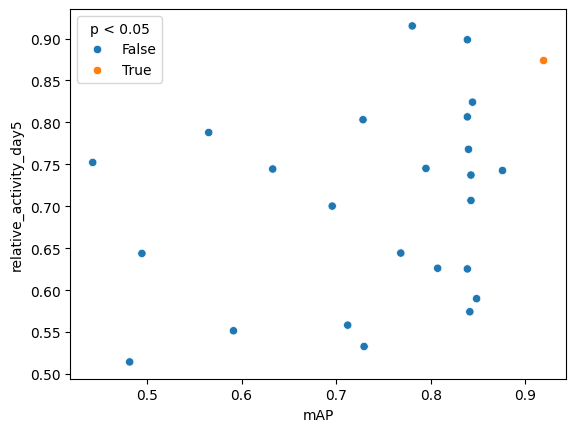

In [43]:
sns.scatterplot(data=bulk_map_results, x="mAP", y="relative_activity_day5", hue="p < 0.05")

In [26]:


# # Some genes have very small variance still, remove these!
# genes_to_retain = (
#     # pd.DataFrame(bulk_df.filter(regex="^(?!Metadata_)").var() > 0.001)
#     bulk_df
#     .reset_index()
#     .rename({"index": "gene", 0: "keep"}, axis="columns")
#     .query("keep")
#     .gene.tolist()
# )

# bulk_subset_df = bulk_df.loc[:, ["Metadata_guide_identity"] + genes_to_retain]

# # create a column for the gene
# bulk_subset_df = bulk_df.assign(
#     Metadata_gene_identity=[x.split("_")[0] for x in bulk_subset_df.Metadata_guide_identity]
# ).query("Metadata_gene_identity != '*'")

# print(bulk_subset_df.shape)
# bulk_subset_df.head()

## Calculate Grit

### Bulk profiles

In [9]:
barcode_col = "Metadata_guide_identity"
gene_col = "Metadata_gene_identity"

replicate_group_grit = {"profile_col": barcode_col, "replicate_group_col": gene_col}

bulk_df["Metadata_is_control"] = bulk_df.Metadata_guide_identity.str.contains("neg_ctrl").astype(int)
neg_controls = [x for x in bulk_subset_df.Metadata_guide_identity if "neg_ctrl" in x]
neg_controls

['neg_ctrl_non-targeting_00001',
 'neg_ctrl_non-targeting_00028',
 'neg_ctrl_non-targeting_00054',
 'neg_ctrl_non-targeting_00089',
 'neg_ctrl_non-targeting_00217',
 'neg_ctrl_non-targeting_00283',
 'neg_ctrl_non-targeting_00406',
 'neg_ctrl_non-targeting_00527',
 'neg_ctrl_non-targeting_00802',
 'neg_ctrl_non-targeting_01040']

In [11]:
pair_config = {
    "pos_sameby": {"all": ["Metadata_gene_identity", "Metadata_is_control == 0"], "any": []},
    "pos_diffby": {"all": [], "any": []},
    "neg_sameby": {"all": [], "any": []},
    "neg_diffby": {"all": ["Metadata_is_control"], "any": []},
}

map_config = {
    "mean_ap": {
        "null_size": 10000,
        "groupby_columns": ["Metadata_gene_identity"],
    },
}

map_results = evaluate_metrics(
    profiles=bulk_df.reset_index(drop=True),
    features=genes_to_retain,
    meta_features=bulk_df.filter(regex="Metadata_").columns,
    replicate_groups=pair_config,
    metrics_config=map_config,
    use_copairs=True,
)

NameError: name 'evaluate_metricd' is not defined

In [11]:
result = map_results["mean_ap"]
result.rename({"Metadata_guide_identity": "perturbation", "Metadata_gene_ientity": "group"}, axis="columns", inplace=True)
result

,perturbation,Metadata_gene_identity,mean_ap,p_value,n_pos_pairs,n_total_pairs
0,ALDOA_ALDOA_+_30077139.23-P1P2_00,ALDOA,0.498893,0.416058,4.0,14.0
1,ALDOA_ALDOA_+_30077139.23-P1P2_06,ALDOA,0.448135,0.508774,4.0,14.0
2,ALDOA_ALDOA_+_30077139.23-P1P2_07,ALDOA,0.371323,0.658501,4.0,14.0
3,ALDOA_ALDOA_+_30077139.23-P1P2_13,ALDOA,0.217699,0.957954,4.0,14.0
4,ATP5E_ATP5E_-_57607036.23-P1P2_00,ATP5E,0.637972,0.315388,4.0,14.0
...,...,...,...,...,...,...
98,SEC61A1_SEC61A1_-_127771295.23-P1_03,SEC61A1,0.603251,0.496400,4.0,14.0
99,TUBB_TUBB_+_30688126.23-P1_00,TUBB,0.841165,0.199400,4.0,14.0
100,TUBB_TUBB_+_30688126.23-P1_01,TUBB,0.801456,0.249000,4.0,14.0
101,TUBB_TUBB_+_30688126.23-P1_03,TUBB,0.735275,0.331667,4.0,14.0


In [63]:
# Merge with activity results and output file
output_results_file = pathlib.Path(f"results/{gse_id}_map.tsv")

result = result.merge(activity_df, left_on="perturbation", right_on="perturbation")

result.to_csv(output_results_file, sep="\t", index=False)

print(result.shape)
result.head(3)

(103, 13)


,perturbation,Metadata_gene_identity,mean_ap,p_value,n_pos_pairs,n_total_pairs,id,sequence,gene,gamma_day5,gamma_day10,relative_activity_day5,relative_activity_day10
0,ALDOA_ALDOA_+_30077139.23-P1P2_00,ALDOA,0.498893,0.416058,4.0,14.0,ALDOA_+_30077139.23-P1P2_00,GGTCACCAGGACCCCTTCTG,ALDOA,-0.412746,-0.366469,1.000000,1.000000
1,ALDOA_ALDOA_+_30077139.23-P1P2_06,ALDOA,0.448135,0.508774,4.0,14.0,ALDOA_+_30077139.23-P1P2_06,GGTCACCAGGATCCCTTCTG,ALDOA,-0.396687,-0.348503,0.961091,0.950977
2,ALDOA_ALDOA_+_30077139.23-P1P2_07,ALDOA,0.371323,0.658501,4.0,14.0,ALDOA_+_30077139.23-P1P2_07,GGTCACCAGGCCCCCTTCTG,ALDOA,-0.360892,-0.335059,0.874369,0.914291


In [61]:
# result = evaluate(
#     profiles=bulk_df,
#     features=genes_to_retain,
#     meta_features=[barcode_col, gene_col],
#     replicate_groups=replicate_group_grit,
#     operation="grit",
#     grit_control_perts=neg_controls,
# )

# result = result.dropna().sort_values(by="grit", ascending=False).reset_index(drop=True)

# print(result.shape)
# result.head(3)

In [64]:
# # Merge with activity results and output file
# output_results_file = pathlib.Path(f"results/{gse_id}_grit.tsv")

# result = result.merge(activity_df, left_on="perturbation", right_on="perturbation")

# result.to_csv(output_results_file, sep="\t", index=False)

# print(result.shape)
# result.head(3)

### Single cells

In [14]:
# Determine a proportion of negative control guide population
sc_neg_controls_df = sc_gene_exp_df.query("Metadata_guide_identity in @neg_controls").sample(frac=0.2)

sc_neg_controls = sc_neg_controls_df.query("Metadata_guide_identity in @neg_controls").Metadata_cell_identity.tolist()

replicate_group_grit = {
    "profile_col": "Metadata_cell_identity",
    "replicate_group_col": "Metadata_guide_identity",
}

In [18]:
sc_gene_exp_df

,Metadata_cell_identity,Metadata_cell_barcode,Metadata_guide_identity,Metadata_read_count,Metadata_UMI_count,Metadata_coverage,Metadata_gemgroup,Metadata_good_coverage,Metadata_number_of_cells,Metadata_gene_identity,...,YPEL4,YPEL5,ZBTB38,ZFAS1,ZFP36L1,ZNF365,ZNF43,ZNF483,ZNF556,ZYX
0,sc_profile_0,AAACCTGAGAGTAATC-1,RAN_RAN_+_131356438.23-P1P2_12,544.0,34.0,16.000000,1.0,True,1.0,RAN,...,-0.09309,-0.632468,-0.539091,-1.633805,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
1,sc_profile_1,AAACCTGAGGGATCTG-1,neg_ctrl_non-targeting_00089,267.0,19.0,14.052632,1.0,True,1.0,neg,...,-0.09309,-0.632468,-0.539091,1.610220,1.322265,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
2,sc_profile_2,AAACCTGAGGTCATCT-1,POLR2H_POLR2H_+_184081251.23-P1P2_08,622.0,34.0,18.294118,1.0,True,1.0,POLR2H,...,-0.09309,-0.632468,-0.539091,-0.567252,0.057540,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
3,sc_profile_3,AAACCTGCAATGGAGC-1,TUBB_TUBB_+_30688126.23-P1_03,433.0,20.0,21.650000,1.0,True,1.0,TUBB,...,-0.09309,1.765279,-0.539091,-1.659420,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
4,sc_profile_4,AAACCTGCACCAGGCT-1,CDC23_CDC23_-_137548987.23-P1P2_04,136.0,8.0,17.000000,1.0,True,1.0,CDC23,...,-0.09309,0.686753,-0.539091,0.541260,0.934539,-0.012155,-0.017763,-0.026877,-0.0524,1.406718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23532,sc_profile_23532,TTTGTCAGTTTGACTG-3,CDC23_CDC23_-_137548987.23-P1P2_11,1509.0,106.0,14.235849,3.0,True,3.0,CDC23,...,-0.09309,0.207130,-0.539091,-0.772589,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
23533,sc_profile_23533,TTTGTCAGTTTGTTGG-3,ATP5E_ATP5E_-_57607036.23-P1P2_16,1207.0,73.0,16.534247,3.0,True,1.0,ATP5E,...,-0.09309,-0.632468,-0.539091,-0.539488,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
23534,sc_profile_23534,TTTGTCATCACAAACC-3,HSPE1_HSPE1_+_198365089.23-P1P2_01,378.0,25.0,15.120000,3.0,True,1.0,HSPE1,...,-0.09309,-0.632468,0.738755,-0.341440,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229
23535,sc_profile_23535,TTTGTCATCAGCATGT-3,neg_ctrl_non-targeting_00028,856.0,53.0,16.150943,3.0,True,1.0,neg,...,-0.09309,0.379025,0.571873,0.294543,-0.876912,-0.012155,-0.017763,-0.026877,-0.0524,-0.452229


In [69]:
pair_config = {
    "pos_sameby": {"all": ["Metadata_guide_identity", "Metadata_is_control == 0"], "any": []},
    "pos_diffby": {"all": [], "any": []},
    "neg_sameby": {"all": [], "any": []},
    "neg_diffby": {"all": ["Metadata_is_control"], "any": []},
}

map_config = {
    "mean_ap": {
        "null_size": 10000,
        "groupby_columns": ["Metadata_guide_identity", "Metadata_cell_identity"],
    },
}

In [70]:
all_sc_grit_results = []
all_sc_umap_embeddings = []

genes = sc_gene_exp_df.Metadata_gene_identity.unique()
for gene in genes:
    if gene not in ["neg", "*", "nan", np.nan]:
        print(f"Now analyzing {gene}...")
        subset_sc_df = sc_gene_exp_df.query("Metadata_gene_identity in @gene")

        # There are a certain number of guides targeting each gene
        guides = subset_sc_df.Metadata_guide_identity.unique()

        # Use the same controls in every experiment
        subset_sc_df = pd.concat([subset_sc_df, sc_neg_controls_df]).reset_index(drop=True)

        # Apply UMAP to single cell profiles (all profiles of one gene + neg controls)
        embedding = umap.UMAP().fit_transform(subset_sc_df.loc[:, genes_to_retain])

        # Combine results with single cell dataframe
        embedding_df = pd.concat(
            [
                subset_sc_df.drop(gene_features, axis="columns").reset_index(drop=True),
                pd.DataFrame(embedding, columns=["umap_0", "umap_1"]),
            ],
            axis="columns",
        )

        # Append to list
        all_sc_umap_embeddings.append(embedding_df.assign(grit_gene=gene))

        # Now calculate sc-Grit per guide
        for guide in guides:
            subset_guide_df = pd.concat(
                [
                    subset_sc_df.query("Metadata_guide_identity == @guide"),
                    sc_neg_controls_df,
                ]
            ).reset_index(drop=True)

            # Calculate Grit
            # Note, every negative control single cell will recieve MULTIPLE grit scores
            # depending on the replicate group information (replicate_group_col)!
            subset_guide_df["Metadata_is_control"] = subset_guide_df.Metadata_cell_identity.isin(
                sc_neg_controls
            ).astype(int)

            map_results = evaluate_metrics(
                profiles=subset_guide_df.reset_index(drop=True),
                features=genes_to_retain,
                meta_features=subset_guide_df.filter(regex="Metadata_").columns,
                replicate_groups=pair_config,
                metrics_config=map_config,
                use_copairs=True,
            )["mean_ap"]
            all_sc_grit_results.append(map_results.assign(grit_gene=gene, grit_guide=guide))

            # sc_grit_result = evaluate(
            #     profiles=subset_guide_df,
            #     features=genes_to_retain,
            #     meta_features=["Metadata_guide_identity", "Metadata_cell_identity"],
            #     replicate_groups=replicate_group_grit,
            #     operation="grit",
            #     grit_control_perts=[str(x) for x in sc_neg_controls],
            # )

            # all_sc_grit_results.append(sc_grit_result.assign(grit_gene=gene, grit_guide=guide))

Now analyzing RAN...

Calculating distances.
Pos pairs size: 20301, Neg pairs size: 98374


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 6903, Neg pairs size: 57466


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 12880, Neg pairs size: 78407


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 35778, Neg pairs size: 130516


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 7875, Neg pairs size: 61362


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing POLR2H...

Calculating distances.
Pos pairs size: 4753, Neg pairs size: 47726


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 5151, Neg pairs size: 49674


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 3081, Neg pairs size: 38473


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 6105, Neg pairs size: 54057


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 5356, Neg pairs size: 50648


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing TUBB...

Calculating distances.
Pos pairs size: 3570, Neg pairs size: 41395


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 5151, Neg pairs size: 49674


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 21945, Neg pairs size: 102270


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 12720, Neg pairs size: 77920


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 6555, Neg pairs size: 56005


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing CDC23...

Calculating distances.
Pos pairs size: 10153, Neg pairs size: 69641


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 11628, Neg pairs size: 74511


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 7503, Neg pairs size: 59901


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 52003, Neg pairs size: 157301


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 3741, Neg pairs size: 42369


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing POLR1D...

Calculating distances.
Pos pairs size: 56953, Neg pairs size: 164606


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 31878, Neg pairs size: 123211


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 79800, Neg pairs size: 194800


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 15576, Neg pairs size: 86199


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 21321, Neg pairs size: 100809


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing DUT...

Calculating distances.
Pos pairs size: 101926, Neg pairs size: 220124


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 49141, Neg pairs size: 152918


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 31878, Neg pairs size: 123211


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 2850, Neg pairs size: 37012


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 10878, Neg pairs size: 72076


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing HSPA5...

Calculating distances.
Pos pairs size: 4278, Neg pairs size: 45291


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 14028, Neg pairs size: 81816


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 10011, Neg pairs size: 69154


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 26565, Neg pairs size: 112497


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 6105, Neg pairs size: 54057


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

Now analyzing MTOR...

Calculating distances.
Pos pairs size: 11325, Neg pairs size: 73537


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 5151, Neg pairs size: 49674


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 82215, Neg pairs size: 197722


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 11476, Neg pairs size: 74024


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 11628, Neg pairs size: 74511


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

Now analyzing GATA1...

Calculating distances.
Pos pairs size: 5671, Neg pairs size: 52109


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 10153, Neg pairs size: 69641


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 3081, Neg pairs size: 38473


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 9730, Neg pairs size: 68180


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 1326, Neg pairs size: 25324


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 1540, Neg pairs size: 27272


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing GINS1...

Calculating distances.
Pos pairs size: 52326, Neg pairs size: 157788


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 24090, Neg pairs size: 107140


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 15576, Neg pairs size: 86199


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 8515, Neg pairs size: 63797


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 1128, Neg pairs size: 23376


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing HSPE1...

Calculating distances.
Pos pairs size: 32640, Neg pairs size: 124672


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 19701, Neg pairs size: 96913


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 16110, Neg pairs size: 87660


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 8911, Neg pairs size: 65258


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 21528, Neg pairs size: 101296


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing RPS14...

Calculating distances.
Pos pairs size: 22155, Neg pairs size: 102757


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 21528, Neg pairs size: 101296


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 20910, Neg pairs size: 99835


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 2415, Neg pairs size: 34090


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 10296, Neg pairs size: 70128


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 7381, Neg pairs size: 59414


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing EIF2S1...

Calculating distances.
Pos pairs size: 10731, Neg pairs size: 71589


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 10878, Neg pairs size: 72076


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 5565, Neg pairs size: 51622


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 3916, Neg pairs size: 43343


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 7626, Neg pairs size: 60388


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing DBR1...

Calculating distances.
Pos pairs size: 65703, Neg pairs size: 176781


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 18915, Neg pairs size: 94965


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 28920, Neg pairs size: 117367


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 7875, Neg pairs size: 61362


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 16471, Neg pairs size: 88634


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing CAD...

Calculating distances.
Pos pairs size: 8385, Neg pairs size: 63310


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 10011, Neg pairs size: 69154


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 26565, Neg pairs size: 112497


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 32131, Neg pairs size: 123698


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 6786, Neg pairs size: 56979


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing SEC61A1...

Calculating distances.
Pos pairs size: 6670, Neg pairs size: 56492


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 7626, Neg pairs size: 60388


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 9180, Neg pairs size: 66232


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 24531, Neg pairs size: 108114


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 26335, Neg pairs size: 112010


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing RPL9...

Calculating distances.
Pos pairs size: 6216, Neg pairs size: 54544


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 6216, Neg pairs size: 54544


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 16290, Neg pairs size: 88147


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 7626, Neg pairs size: 60388


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 3081, Neg pairs size: 38473


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

Now analyzing HSPA9...

Calculating distances.
Pos pairs size: 3916, Neg pairs size: 43343


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 6328, Neg pairs size: 55031


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 3828, Neg pairs size: 42856


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 14878, Neg pairs size: 84251


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 3081, Neg pairs size: 38473


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

Now analyzing RPS18...

Calculating distances.
Pos pairs size: 7875, Neg pairs size: 61362


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 4371, Neg pairs size: 45778


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 20301, Neg pairs size: 98374


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 5565, Neg pairs size: 51622


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 4950, Neg pairs size: 48700


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing ALDOA...

Calculating distances.
Pos pairs size: 5253, Neg pairs size: 50161


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 3240, Neg pairs size: 39447


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 14365, Neg pairs size: 82790


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 6555, Neg pairs size: 56005


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 12090, Neg pairs size: 75972


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing RPS15...

Calculating distances.
Pos pairs size: 5671, Neg pairs size: 52109


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 8646, Neg pairs size: 64284


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 3486, Neg pairs size: 40908


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 9730, Neg pairs size: 68180


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 26335, Neg pairs size: 112010


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

Now analyzing ATP5E...

Calculating distances.
Pos pairs size: 22791, Neg pairs size: 104218


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 14878, Neg pairs size: 84251


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 6441, Neg pairs size: 55518


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 13366, Neg pairs size: 79868


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 13861, Neg pairs size: 81329


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


Now analyzing COX11...

Calculating distances.
Pos pairs size: 47586, Neg pairs size: 150483


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 22366, Neg pairs size: 103244


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 10153, Neg pairs size: 69641


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 6216, Neg pairs size: 54544


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 12090, Neg pairs size: 75972


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

Now analyzing BCR...

Calculating distances.
Pos pairs size: 31878, Neg pairs size: 123211


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 4560, Neg pairs size: 46752


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 8256, Neg pairs size: 62823


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 5050, Neg pairs size: 49187


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 9591, Neg pairs size: 67693


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 11325, Neg pairs size: 73537


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

Now analyzing GNB2L1...

Calculating distances.
Pos pairs size: 170236, Neg pairs size: 284408


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos



Calculating distances.
Pos pairs size: 6328, Neg pairs size: 55031


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 8646, Neg pairs size: 64284


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 10153, Neg pairs size: 69641


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]


Calculating distances.
Pos pairs size: 561, Neg pairs size: 16558


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/2 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:89: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos


In [71]:
all_sc_umap_embeddings = pd.concat(all_sc_umap_embeddings).reset_index(drop=True)

# Output file
output_results_file = pathlib.Path(f"results/{gse_id}_single_cell_umap_embeddings.tsv.gz")
all_sc_umap_embeddings.to_csv(output_results_file, sep="\t", compression="gzip", index=False)

print(all_sc_umap_embeddings.shape)
all_sc_umap_embeddings.head()

(32944, 15)


,Metadata_cell_identity,Metadata_cell_barcode,Metadata_guide_identity,Metadata_read_count,Metadata_UMI_count,Metadata_coverage,Metadata_gemgroup,Metadata_good_coverage,Metadata_number_of_cells,Metadata_gene_identity,Metadata_barcode,Metadata_sequence,umap_0,umap_1,grit_gene
0,sc_profile_0,AAACCTGAGAGTAATC-1,RAN_RAN_+_131356438.23-P1P2_12,544.0,34.0,16.000000,1.0,True,1.0,RAN,AAACCTGAGAGTAATC-1,AAACCTGAGAGTAATC,0.963343,2.139856,RAN
1,sc_profile_165,AACGTTGAGAGTAATC-1,RAN_RAN_+_131356438.23-P1P2_00,625.0,36.0,17.361111,1.0,True,2.0,RAN,AACGTTGAGAGTAATC-1,AACGTTGAGAGTAATC,-0.974019,5.059627,RAN
2,sc_profile_264,AACTTTCTCTAAGCCA-1,RAN_RAN_+_131356438.23-P1P2_04,334.0,19.0,17.578947,1.0,True,1.0,RAN,AACTTTCTCTAAGCCA-1,AACTTTCTCTAAGCCA,0.043807,2.748627,RAN
3,sc_profile_311,AAGGAGCCATGCGCAC-1,RAN_RAN_+_131356438.23-P1P2_02,405.0,22.0,18.409091,1.0,True,1.0,RAN,AAGGAGCCATGCGCAC-1,AAGGAGCCATGCGCAC,0.082392,2.723883,RAN
4,sc_profile_314,AAGGAGCTCCTGTAGA-1,RAN_RAN_+_131356438.23-P1P2_04,926.0,41.0,22.585366,1.0,True,1.0,RAN,AAGGAGCTCCTGTAGA-1,AAGGAGCTCCTGTAGA,0.740550,4.728397,RAN


In [72]:
all_sc_grit_results = pd.concat(all_sc_grit_results).reset_index(drop=True)

# Output file
output_results_file = pathlib.Path(f"results/{gse_id}_single_cell_map.tsv.gz")
all_sc_grit_results.to_csv(output_results_file, sep="\t", compression="gzip", index=False)

print(all_sc_grit_results.shape)
all_sc_grit_results.head()

(20641, 8)


,Metadata_guide_identity,Metadata_cell_identity,mean_ap,p_value,n_pos_pairs,n_total_pairs,grit_gene,grit_guide
0,RAN_RAN_+_131356438.23-P1P2_12,sc_profile_0,0.299814,0.479781,201.0,688.0,RAN,RAN_RAN_+_131356438.23-P1P2_12
1,RAN_RAN_+_131356438.23-P1P2_12,sc_profile_10030,0.297488,0.519024,201.0,688.0,RAN,RAN_RAN_+_131356438.23-P1P2_12
2,RAN_RAN_+_131356438.23-P1P2_12,sc_profile_10094,0.297498,0.518983,201.0,688.0,RAN,RAN_RAN_+_131356438.23-P1P2_12
3,RAN_RAN_+_131356438.23-P1P2_12,sc_profile_10164,0.297455,0.520104,201.0,688.0,RAN,RAN_RAN_+_131356438.23-P1P2_12
4,RAN_RAN_+_131356438.23-P1P2_12,sc_profile_10280,0.297411,0.521261,201.0,688.0,RAN,RAN_RAN_+_131356438.23-P1P2_12
